In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense


In [11]:
df=pd.read_csv("graduate_admission_dataset.csv")

In [12]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [14]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [17]:
df.drop(['Serial No.'],inplace=True,axis=1)

In [25]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [27]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [31]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((350, 7), (150, 7), (350,), (150,))

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [37]:
model=Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 5)                 40        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 102
Trainable params: 102
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(loss='mse',optimizer='Adam')

In [42]:
history=model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
9/9 [==============================] - 2s 51ms/step - loss: 0.0622 - val_loss: 0.0653
Epoch 2/100
9/9 [==============================] - 0s 11ms/step - loss: 0.0481 - val_loss: 0.0504
Epoch 3/100
9/9 [==============================] - 0s 11ms/step - loss: 0.0366 - val_loss: 0.0386
Epoch 4/100
9/9 [==============================] - 0s 13ms/step - loss: 0.0278 - val_loss: 0.0295
Epoch 5/100
9/9 [==============================] - 0s 17ms/step - loss: 0.0213 - val_loss: 0.0228
Epoch 6/100
9/9 [==============================] - 0s 11ms/step - loss: 0.0167 - val_loss: 0.0182
Epoch 7/100
9/9 [==============================] - 0s 11ms/step - loss: 0.0136 - val_loss: 0.0151
Epoch 8/100
9/9 [==============================] - 0s 12ms/step - loss: 0.0116 - val_loss: 0.0130
Epoch 9/100
9/9 [==============================] - 0s 11ms/step - loss: 0.0104 - val_loss: 0.0115
Epoch 10/100
9/9 [==============================] - 0s 11ms/step - loss: 0.0096 - val_loss: 0.0106
Epoch 11/100
9/9 [=

Epoch 84/100
9/9 [==============================] - 0s 13ms/step - loss: 0.0043 - val_loss: 0.0026
Epoch 85/100
9/9 [==============================] - 0s 13ms/step - loss: 0.0043 - val_loss: 0.0027
Epoch 86/100
9/9 [==============================] - 0s 13ms/step - loss: 0.0042 - val_loss: 0.0026
Epoch 87/100
9/9 [==============================] - 0s 13ms/step - loss: 0.0043 - val_loss: 0.0025
Epoch 88/100
9/9 [==============================] - 0s 14ms/step - loss: 0.0043 - val_loss: 0.0026
Epoch 89/100
9/9 [==============================] - 0s 13ms/step - loss: 0.0042 - val_loss: 0.0027
Epoch 90/100
9/9 [==============================] - 0s 16ms/step - loss: 0.0043 - val_loss: 0.0026
Epoch 91/100
9/9 [==============================] - 0s 14ms/step - loss: 0.0042 - val_loss: 0.0025
Epoch 92/100
9/9 [==============================] - 0s 13ms/step - loss: 0.0042 - val_loss: 0.0026
Epoch 93/100
9/9 [==============================] - 0s 15ms/step - loss: 0.0042 - val_loss: 0.0025
Epoch 94/1

In [44]:
y_pred=model.predict(x_test_scaled)

5/5 [==============================] - 0s 4ms/step


In [50]:
from sklearn.metrics import r2_score
print(r2_score(y_pred,y_test))

0.7313718887058085


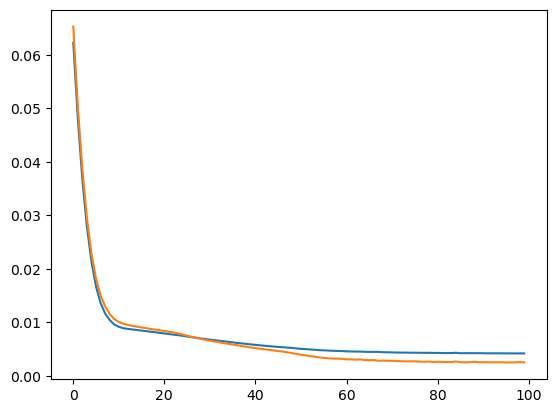

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [54]:
model.save('Graduate_admission_model.h5')